In [2]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt

(train_X, train_Y), (test_X, test_Y) = cifar10.load_data()

[9]


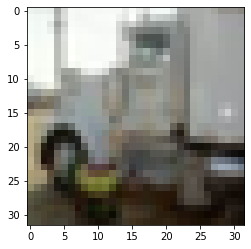

In [3]:
print(train_Y[31])
plt.imshow(train_X[31])

In [4]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.constraints import maxnorm
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

In [5]:
train_x=train_X.astype('float32')
test_X=test_X.astype('float32')
 
train_X=train_X/255.0
test_X=test_X/255.0

In [6]:
train_Y = np_utils.to_categorical(train_Y)
test_Y = np_utils.to_categorical(test_Y)

num_classes = train_Y.shape[1]

In [7]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(32,32,3),
    padding='same',activation='relu',
    kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(64,(5,5),activation='relu',padding='same',kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128,(3,3),activation='relu',padding='same',kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [8]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ["accuracy"])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        51264     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0

In [10]:
model.fit(x = train_X, y = train_Y,
    validation_data = (test_X,test_Y),
    epochs = 15, batch_size = 64)

Epoch 1/15
782/782 [==============================] - 454s 580ms/step - loss: 1.4975 - accuracy: 0.4603 - val_loss: 1.1315 - val_accuracy: 0.5975
Epoch 2/15
782/782 [==============================] - 376s 481ms/step - loss: 1.0599 - accuracy: 0.6259 - val_loss: 0.8946 - val_accuracy: 0.6840
Epoch 3/15
782/782 [==============================] - 365s 467ms/step - loss: 0.8821 - accuracy: 0.6903 - val_loss: 0.8037 - val_accuracy: 0.7183
Epoch 4/15
782/782 [==============================] - 365s 467ms/step - loss: 0.7722 - accuracy: 0.7305 - val_loss: 0.7523 - val_accuracy: 0.7369
Epoch 5/15
782/782 [==============================] - 366s 467ms/step - loss: 0.7005 - accuracy: 0.7539 - val_loss: 0.7269 - val_accuracy: 0.7487
Epoch 6/15
782/782 [==============================] - 379s 485ms/step - loss: 0.6339 - accuracy: 0.7786 - val_loss: 0.7297 - val_accuracy: 0.7465
Epoch 7/15
782/782 [==============================] - 502s 642ms/step - loss: 0.5768 - accuracy: 0.7950 - val_loss: 0.7025 -

In [11]:
  _, acc = model.evaluate(train_X, train_Y)

1563/1563 [==============================] - 73s 47ms/step - loss: 0.1440 - accuracy: 0.9623


In [12]:
model.save("model.h5")